In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pitchLengthX=120
pitchWidthY=80


In [3]:
match_id_required = 8655
home_team_required ="France"
away_team_required ="Belgium"

In [4]:
file_name=str(match_id_required)+'.json'

In [5]:

import json
with open('E:\Football Analysis\Source Code\Statsbomb\data\events\\'+file_name, encoding="mbcs") as data_file:
    data = json.load(data_file)

In [6]:
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])


In [7]:
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

In [8]:
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

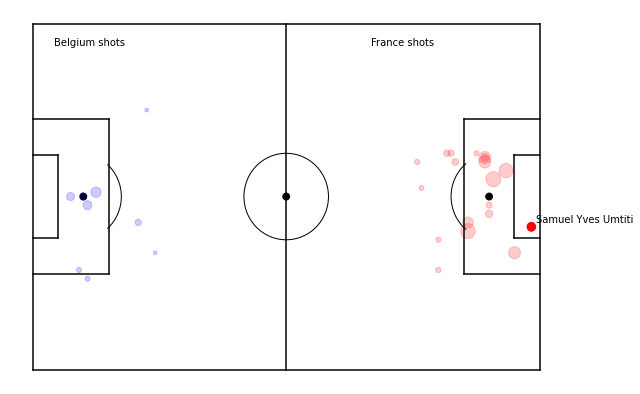

In [9]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','black')

for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    circleSize=np.sqrt(shot['shot_statsbomb_xg']*15)

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7) 
plt.show()